<a href="https://colab.research.google.com/github/sadoky/inteligencia-_articial_ELECT/blob/main/perceptr%C3%B3n_profesor_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptrón_corregido_Learn_Rate

**LIBRERIAS**


In [66]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

**Función_escalon_prediicion**

In [67]:
def escalon(t):
    if t >= 0:
        return 1
    return 0

def prediccion(X, W, b):
    return escalon((np.matmul(X,W)+b)[0])

**Correccion_de_pesos_y_bias**

In [68]:
def perceptron_escalon(X, y, W, b, learn_rate = 0.9):
    
    solucion=prediccion(X,W,b)

    if np.array_equal(y,solucion):
         W[0]=W[0]+(3*learn_rate)
         W[1]=W[1]+learn_rate
         b=b+(6.3*learn_rate)
    else:
         W[0]=W[0]+(3*learn_rate)
         W[1]=W[1]+learn_rate
         b=b-(6.3*learn_rate)
    

    return W, b

#Entrenamiento_Perceptron

In [69]:
def entrenamiento(X, y, learn_rate=0.9, num_epochs=50):
    """
    Esta funcion entrena el perceptron repetidamente en el dataset y retorna las lineas de clasificacion
    obtenidas en las iteraciones,
    
    """
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    
    b = np.random.rand(1)[0] + x_max
    
    # Lineas que seran ploteadas.
    lineas = []
    for i in range(num_epochs):
        # En cada epoch, se aplica el perceptron.
        W, b = perceptron_escalon(X, y, W, b, learn_rate)
        lineas.append((-W[0]/W[1], -b/W[0]))
        
    return lineas

**Función_para_graficar_epocas**

In [70]:
def plot_line(m, b, linestyle='dashed', color='gray', fill=False):
    """
    Helper function to avoid repetitive code when plotting boundary lines
    """
    x = np.arange(-0.5, 1.5, 0.1)
    plt.plot(x, m*x+b, linestyle=linestyle, color=color)
    if fill:
        plt.fill_between(x, m*x+b, -0.05, color=blue, alpha=0.3)
        plt.fill_between(x, m*x+b, 1.05, color=red, alpha=0.3)


**Lectura_y_asiganción_de_datos**

In [71]:
data = np.asarray(pd.read_csv("https://raw.githubusercontent.com/sadoky/inteligencia-_articial_ELECT/main/data.csv"))
X = data[:,0:2]
y = data[:,2]

**activacion_de_función_de_entrenamiento**


In [72]:
lineas = entrenamiento(X, y)

#Gráficas_Resultantes


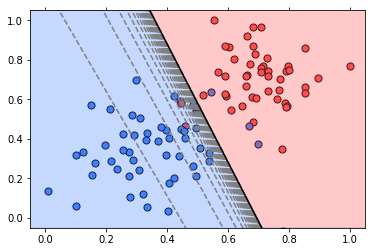

In [73]:
# Estilo de gráfico
plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)
plt.grid(False)
plt.tick_params(axis='x', which='both', bottom='off', top='off')


# Scatter para el grafico
red = [1,0.3,0.3]
blue = [0.25,0.5,1]
red_points = X[np.argwhere(y==0).flatten()]
blue_points = X[np.argwhere(y==1).flatten()]
plt.scatter(red_points[:,0], red_points[:,1], s=50, color=red, edgecolor='k')
plt.scatter(blue_points[:,0], blue_points[:,1], s=50, color=blue, edgecolor='k')


# Plotea lineas y regiones solucion.
for line in lineas:
    slope = line[0]
    b = line[1]
    plot_line(slope, b)


solution_slope = lineas[-1][0]
solution_intercept = lineas[-1][1]
plot_line(solution_slope, solution_intercept, 'solid', 'k', True)
  